In [10]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [11]:
gdpldf = pd.read_csv('all_data.csv')

In [12]:
#print(gdpldf.head())

In [13]:
#print(gdpldf.info)

In [14]:
#See GDP_and_Life_Expectancy_Project_Scope word doc in repository for more information

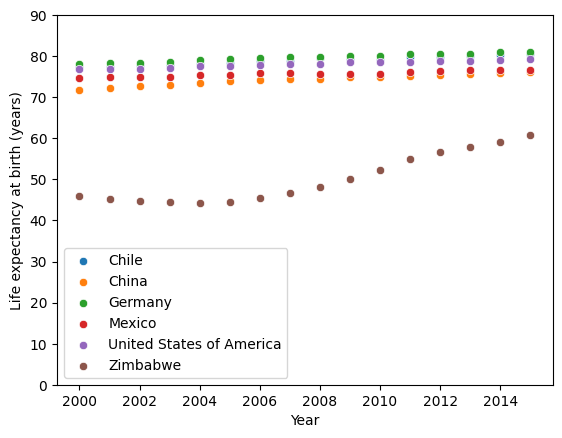

<Figure size 640x480 with 0 Axes>

In [15]:
#Analysis, Question 1: Has life expectancy increased over time in the 6 nations?
ax = plt.subplot()
sns.scatterplot(gdpldf[gdpldf["Country"] == "Chile"], x='Year', y='Life expectancy at birth (years)')
sns.scatterplot(gdpldf[gdpldf["Country"] == "China"], x='Year', y='Life expectancy at birth (years)')
sns.scatterplot(gdpldf[gdpldf["Country"] == "Germany"], x='Year', y='Life expectancy at birth (years)')
sns.scatterplot(gdpldf[gdpldf["Country"] == "Mexico"], x='Year', y='Life expectancy at birth (years)')
sns.scatterplot(gdpldf[gdpldf["Country"] == "United States of America"], x='Year', y='Life expectancy at birth (years)')
sns.scatterplot(gdpldf[gdpldf["Country"] == "Zimbabwe"], x='Year', y='Life expectancy at birth (years)')
ax.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'], loc='best')
plt.yticks(range(0, 100, 10))
plt.show()
plt.clf()

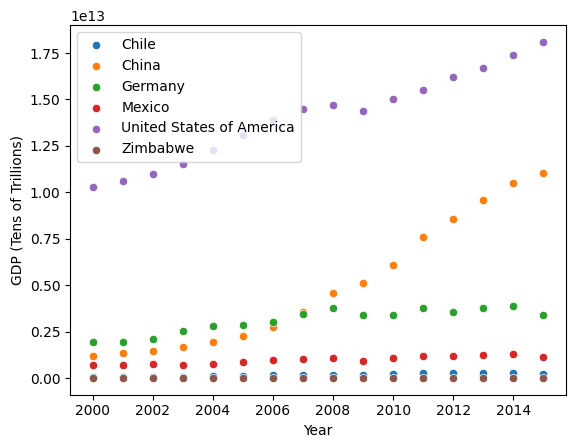

<Figure size 640x480 with 0 Axes>

In [16]:
#Analysis, Question 2: Has GDP increased overtime in the 6 nations?
ax = plt.subplot()
sns.scatterplot(gdpldf[gdpldf["Country"] == "Chile"], x='Year', y='GDP')
sns.scatterplot(gdpldf[gdpldf["Country"] == "China"], x='Year', y='GDP')
sns.scatterplot(gdpldf[gdpldf["Country"] == "Germany"], x='Year', y='GDP')
sns.scatterplot(gdpldf[gdpldf["Country"] == "Mexico"], x='Year', y='GDP')
sns.scatterplot(gdpldf[gdpldf["Country"] == "United States of America"], x='Year', y='GDP')
sns.scatterplot(gdpldf[gdpldf["Country"] == "Zimbabwe"], x='Year', y='GDP')
ax.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'], loc='best')
ax.set_ylabel('GDP (Tens of Trillions)')
plt.show()
plt.clf()


In [17]:
gdp_means = df([int(gdpldf[gdpldf["Country"] == "Chile"]["GDP"].mean()), int(gdpldf[gdpldf["Country"] == "China"]["GDP"].mean()), 
             int(gdpldf[gdpldf["Country"] == "Germany"]["GDP"].mean()), int(gdpldf[gdpldf["Country"] == "Mexico"]["GDP"].mean()), 
             int(gdpldf[gdpldf["Country"] == "United States of America"]["GDP"].mean()), int(gdpldf[gdpldf["Country"] == "Zimbabwe"]["GDP"].mean())])
life_expectancy_means = df([int(gdpldf[gdpldf["Country"] == "Chile"]["Life expectancy at birth (years)"].mean()), int(gdpldf[gdpldf["Country"] == "China"]["Life expectancy at birth (years)"].mean()), 
             int(gdpldf[gdpldf["Country"] == "Germany"]["Life expectancy at birth (years)"].mean()), int(gdpldf[gdpldf["Country"] == "Mexico"]["Life expectancy at birth (years)"].mean()), 
             int(gdpldf[gdpldf["Country"] == "United States of America"]["Life expectancy at birth (years)"].mean()), int(gdpldf[gdpldf["Country"] == "Zimbabwe"]["Life expectancy at birth (years)"].mean())])


In [18]:
gdp_vs_life_expectancy = pd.DataFrame([
    (gdp_means.iloc[0,0], life_expectancy_means.iloc[0,0]), 
    (gdp_means.iloc[1,0], life_expectancy_means.iloc[1,0]), 
    (gdp_means.iloc[2,0], life_expectancy_means.iloc[2,0]), 
    (gdp_means.iloc[3,0], life_expectancy_means.iloc[3,0]), 
    (gdp_means.iloc[4,0], life_expectancy_means.iloc[4,0]), 
    (gdp_means.iloc[5,0], life_expectancy_means.iloc[5,0])
], 
columns=["GDP", "Life Expectancy"])
gdp_vs_life_expectancy_corr = gdp_vs_life_expectancy.corr(method='pearson')
print(f'Average GDP vs Average Life Expectancy by Country 2000-2015: {gdp_vs_life_expectancy_corr}')

Average GDP vs Average Life Expectancy by Country 2000-2015:                       GDP  Life Expectancy
GDP              1.000000         0.377151
Life Expectancy  0.377151         1.000000


In [19]:
print('There is a modest correlation between life expectancy and GDP of about 0.378')

There is a modest correlation between life expectancy and GDP of about 0.378


In [86]:
unique_country = gdpldf['Country'].unique()
avg_life_expectancy_average_by_country_dict = {unique_country[0]:int(life_expectancy_means[0][0]),unique_country[1]:int(life_expectancy_means[0][1]),
unique_country[2]:int(life_expectancy_means[0][2]),unique_country[3]:int(life_expectancy_means[0][3]),unique_country[4]:int(life_expectancy_means[0][4]),
unique_country[5]:int(life_expectancy_means[0][5])}
print('Average Life Expectancy' + ' (Years 2000-2014)' + ' Each Country:')
print(avg_life_expectancy_average_by_country_dict)

Average Life Expectancy (Years 2000-2014) Each Country:
{'Chile': 78, 'China': 74, 'Germany': 79, 'Mexico': 75, 'United States of America': 78, 'Zimbabwe': 50}


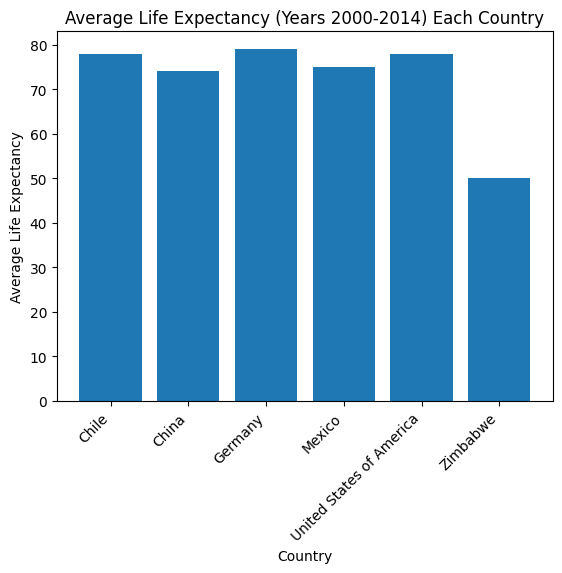

In [89]:
plt.bar(avg_life_expectancy_average_by_country_dict.keys(), avg_life_expectancy_average_by_country_dict.values())
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.title('Average Life Expectancy (Years 2000-2014) Each Country')
plt.show()